In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [103]:
df = pd.read_csv('Student_Performance.csv')

print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [104]:
print(df.describe())
print()
print(df.info())
print()
print(df.isnull().sum())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

In [105]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<h4>Feature Extraction:</h4>

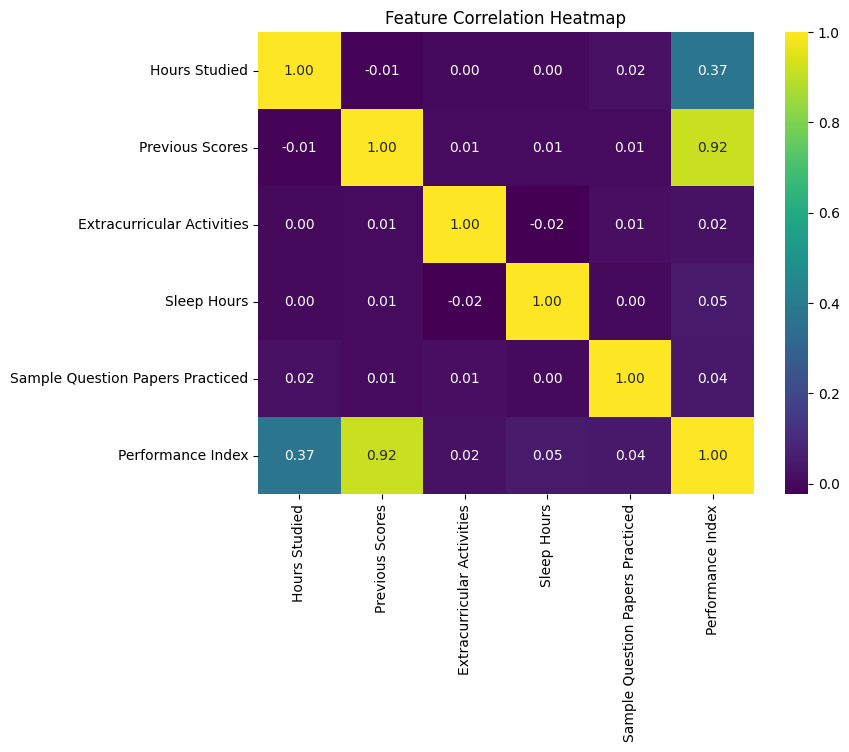

In [106]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation Heatmap")
plt.show()

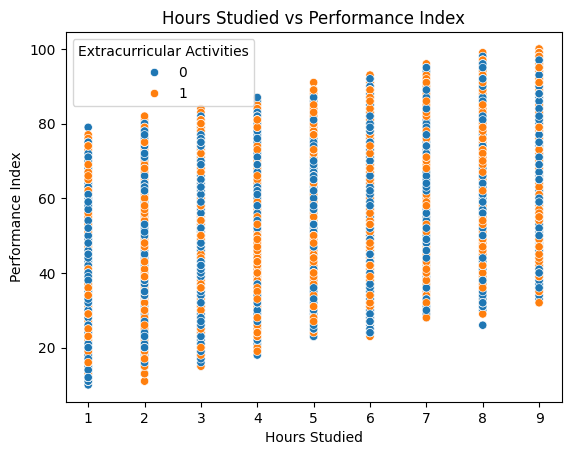

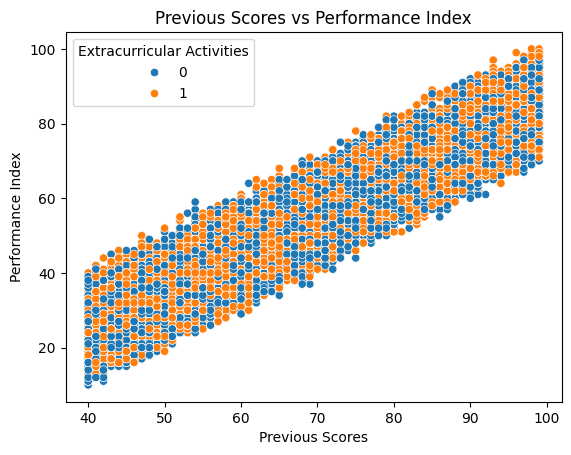

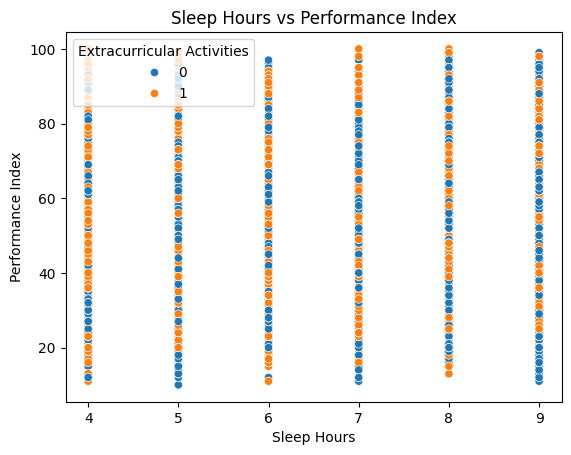

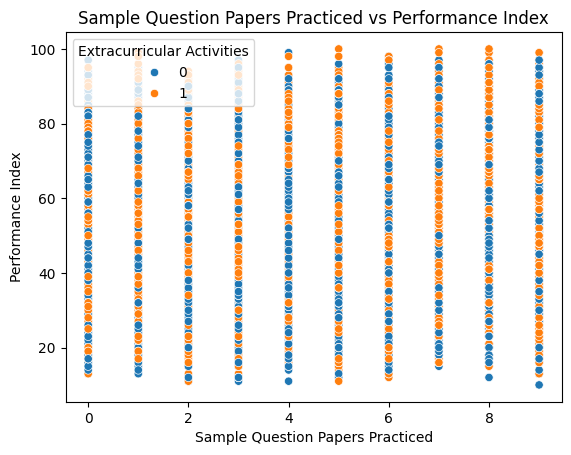

In [107]:

# Scatter plots for numeric features
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for feature in numeric_features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df['Performance Index'], hue=df['Extracurricular Activities'])
    plt.title(f"{feature} vs Performance Index")
    plt.show()

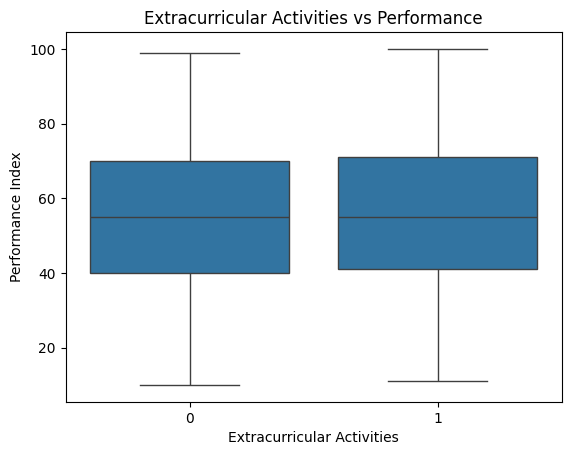

In [108]:

# Boxplot for extracurricular

sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title("Extracurricular Activities vs Performance")
plt.show()

From the heatmap and scatterplots, we see that the features - hours studied and previous scores - has a strong correlation with the performance index. The rest of the features do not have any significant impact. The box plot confirms that extracurricular activities has no impact on the performance index.

In [109]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming df is your DataFrame and 'target_variable' is the column you want to predict
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

# Applying SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Displaying scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

                            Feature         Score
1                   Previous Scores  51555.110025
0                     Hours Studied   1623.181225
3                       Sleep Hours     23.190753
4  Sample Question Papers Practiced     18.752845
2        Extracurricular Activities      6.017146


The SelectKbest feature from sickitlearn also confirms our analysis.

In [110]:
#X = df[["Hours Studied", "Previous Scores"]].values

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)


In [112]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_cv shape: ", X_cv.shape)
print("y_cv shape: ", y_cv.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (6000, 5)
y_train shape:  (6000,)
x_cv shape:  (2000, 5)
y_cv shape:  (2000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [114]:

# Linear Regression baseline

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_test_pred_lin = lin_reg.predict(X_test_scaled)
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_test_pred_lin))


Linear Regression Test MSE: 4.177985513977027


In [115]:
#polynomial regression test

train_errors, cv_errors = [], []
degrees = range(1, 6) 

for d in degrees:
    poly = PolynomialFeatures(degree = d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_cv_poly = poly.transform(X_cv_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_cv_pred = model.predict(X_cv_poly)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    cv_errors.append(mean_squared_error(y_cv, y_cv_pred))

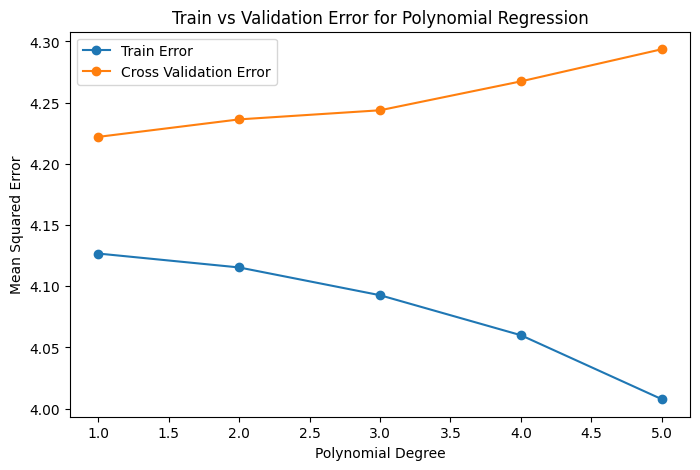

In [116]:
#plot training vs cross validation error

plt.figure(figsize=(8,5))
plt.plot(degrees, train_errors, marker='o', label="Train Error")
plt.plot(degrees, cv_errors, marker='o', label="Cross Validation Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Validation Error for Polynomial Regression")
plt.legend()
plt.show()

In [117]:
best_degree = degrees[np.argmin(cv_errors)]
print(f"Best polynomial degree based on validation: {best_degree}")

Best polynomial degree based on validation: 1


In [118]:
#Selecting the best model

poly_best = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_best.fit_transform(X_train_scaled)
X_cv_poly = poly_best.transform(X_cv_scaled)
X_test_poly = poly_best.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(np.vstack([X_train_poly, X_cv_poly]), np.hstack([y_train, y_cv]))
y_test_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Regression Test MSE:", mean_squared_error(y_test, y_test_pred_poly))


Polynomial Regression Test MSE: 4.167113138686565


In [119]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge with cross-validation
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(np.vstack([X_train_poly, X_cv_poly]), np.hstack([y_train, y_cv]))
y_test_pred_ridge_cv = ridge_cv.predict(X_test_poly)

print("Best Ridge alpha:", ridge_cv.alpha_)
print("RidgeCV Test MSE:", mean_squared_error(y_test, y_test_pred_ridge_cv))

# Lasso with cross-validation
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=5, max_iter=10000)
lasso_cv.fit(np.vstack([X_train_poly, X_cv_poly]), np.hstack([y_train, y_cv]))
y_test_pred_lasso_cv = lasso_cv.predict(X_test_poly)

print("Best Lasso alpha:", lasso_cv.alpha_)
print("LassoCV Test MSE:", mean_squared_error(y_test, y_test_pred_lasso_cv))


Best Ridge alpha: 0.01
RidgeCV Test MSE: 4.167115849146707
Best Lasso alpha: 0.0001
LassoCV Test MSE: 4.167133397157052


The values of MSE for each model:

Linear Regression Test MSE: 4.177985513977027

Polynomial Regression Test MSE: 4.167113138686565

RidgeCV Test MSE: 4.167115849146707

LassoCV Test MSE: 4.167133397157052


We can see that polynormal regression with degree = 1 gives the least Mean Squared Error. 

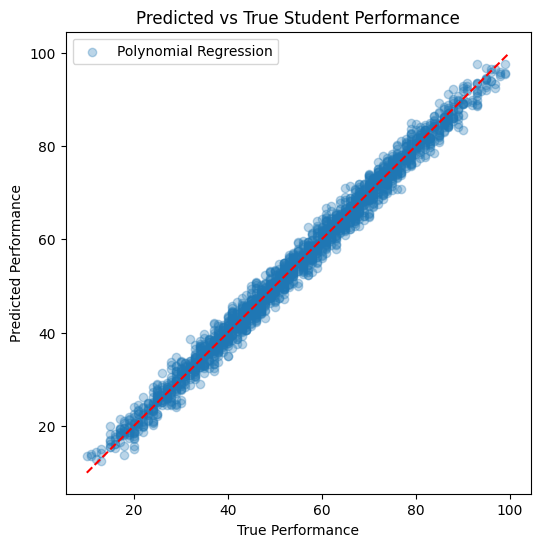

In [120]:
#Plot Predictions vs Actual Values Using Polynomial Regression

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.3, label="Polynomial Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Performance")
plt.ylabel("Predicted Performance")
plt.title("Predicted vs True Student Performance")
plt.legend()
plt.show()